# Loading libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as statsmodels

%matplotlib inline

# Reading data

## Demographical data

In [3]:
df_demo=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_demo.txt")
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [4]:
df_demo['clnt_age'].mean().round(0)

46.0

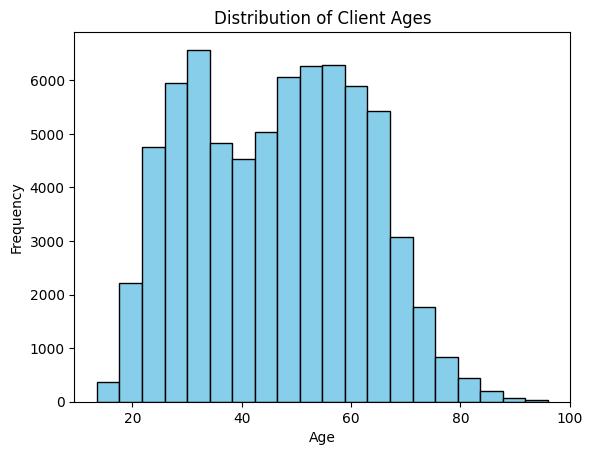

In [5]:
import matplotlib.pyplot as plt

# Visualize the distribution of ages
plt.hist(df_demo['clnt_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Client Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

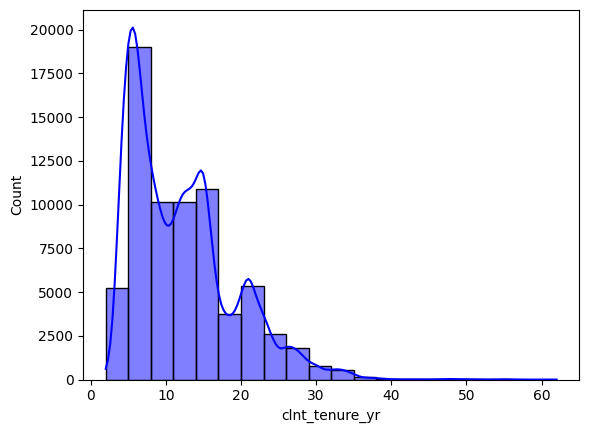

In [6]:
sns.histplot(df_demo['clnt_tenure_yr'], kde=True, bins=20, color="blue");

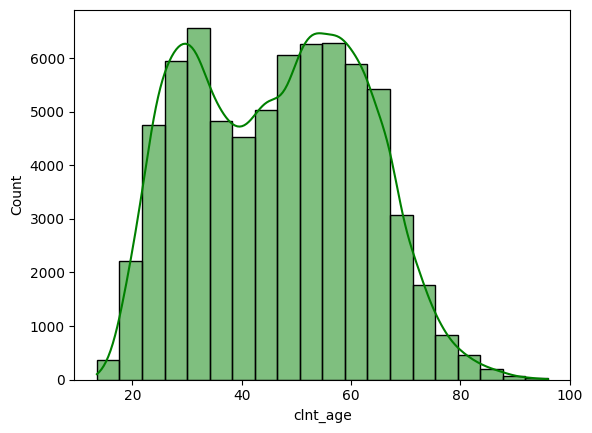

In [7]:
sns.histplot(df_demo['clnt_age'], kde=True, bins=20, color="green");

## Group data

In [8]:
df_experiment=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_experiment_clients.txt")
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


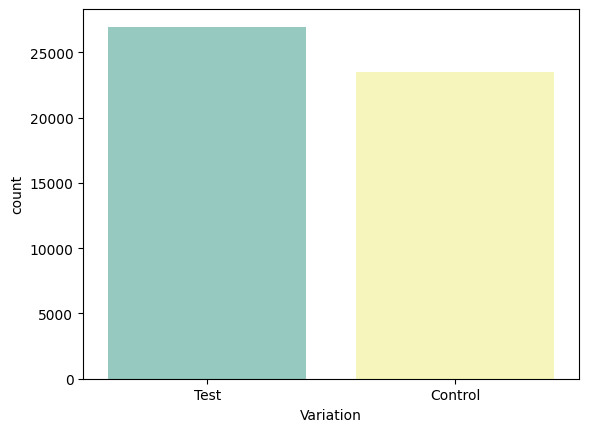

In [9]:
sns.countplot(data=df_experiment, x='Variation', palette="Set3", hue='Variation', legend=False);

## Web data

In [10]:
#To be concaneted to df1
data_1=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_web_data_pt_1.txt")
data_2=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_web_data_pt_2.txt")


In [11]:
data_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [12]:
#checking for null values
data_1.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [13]:
#checking for duplictes for data_1
data_1.duplicated().sum()

2095

In [14]:
#drpping duplicates for data_1
data_1=data_1.drop_duplicates()
data_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [15]:
data_1.duplicated().sum()

0

In [16]:
#checking for null values for data_2
data_2.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [17]:
#checking for duplictes for data_2
data_2.duplicated().sum()

8669

In [18]:
#droppinf duplicates for data_2
data_2=data_2.drop_duplicates()
data_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [19]:
data_2.duplicated().sum()

0

In [20]:
#concatenated
df_web_data=pd.concat([data_1,data_2],axis=0)
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [21]:
df_web_data.duplicated().sum()


0

In [22]:
df_web_data.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [23]:
#checking for duplicates for df_demo
df_demo.duplicated().sum()

0

In [24]:
#checking for null values for df_demo
df_demo.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [25]:
#checking for null values for df_experiment
df_experiment.isna().sum()

client_id        0
Variation    20109
dtype: int64

In [26]:
#checking for duplicates  for df_experiment
df_experiment.duplicated().sum()

0

In [27]:
df_experiment = df_experiment[df_experiment['Variation'].isna()==False]
print(df_experiment.isna().sum())
display(df_experiment)

client_id    0
Variation    0
dtype: int64


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [28]:
print(df_experiment.index.duplicated().sum())

0


In [30]:
df_experiment.isna().sum()

client_id    0
Variation    0
dtype: int64

# Merging data

In [123]:
merged_df = pd.merge(df_web_data, df_experiment, how="inner", left_on="client_id", right_on="client_id")
merged_df

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


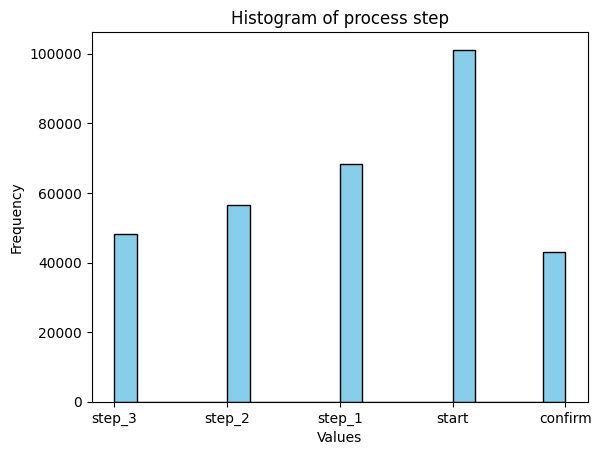

In [224]:
import matplotlib.pyplot as plt

# Visualizing a specific column (e.g., 'column_name') using a histogram
plt.hist(merged_df['process_step'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of process step')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [124]:
merged_df.duplicated().sum()

0

In [125]:
merged_df.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
Variation       0
dtype: int64

In [126]:
merged_df.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
Variation       object
dtype: object

In [128]:
merged_df['date_time'] = pd.to_datetime(merged_df['date_time'])

In [129]:
merged_df.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
Variation               object
dtype: object

In [130]:
merged_df.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
Variation       0
dtype: int64

In [131]:
merged_df.head()

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test


In [169]:
#Frequency counts for 
fre_gender=df_demo["gendr"].value_counts()
fre_gender

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

The primary clients for this online platform are undicslosed however the males and females are active as well as the dfiiference is not that big.


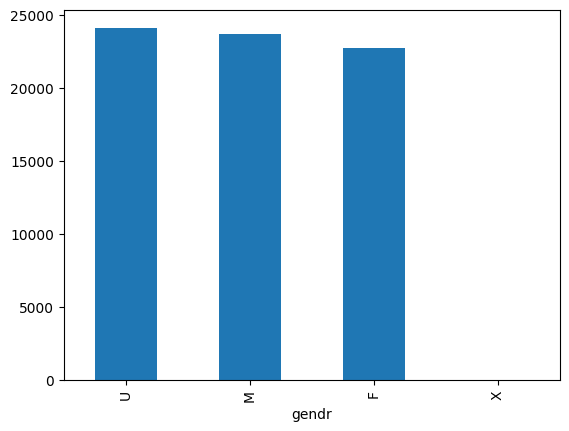

In [172]:
df_demo['gendr'].value_counts().plot(kind='bar');

In [134]:
# binning the age data into age groups
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]  # adjust bins as needed
bin_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_demo['age_group'] = pd.cut(df_demo['clnt_age'], bins=age_bins, labels=bin_labels, right=False)

# now you can get a simple count of clients within each age group
age_group_counts = df_demo['age_group'].value_counts().sort_index()
print(age_group_counts)

# gender count
gender_counts = df_demo['gendr'].value_counts()
print(gender_counts)

age_group
0-18        374
19-30     12925
31-40     13132
41-50     12419
51-60     15525
61-70     11950
71-80      3572
81-90       648
91-100       49
Name: count, dtype: int64
gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64


In [148]:
# filter the df for only gender type 'U'
df_u = df_demo[df_demo['gendr'] == 'U']

df_u['age_group'] = pd.cut(df_u['clnt_age'], bins=age_bins, labels=bin_labels, right=False)

# counting the number of 'U' clients within each age group
age_group_counts_u = df_u['age_group'].value_counts().sort_index()
print(age_group_counts_u)

age_group
0-18       240
19-30     7418
31-40     4708
41-50     3633
51-60     4347
61-70     2986
71-80      654
81-90      122
91-100      14
Name: count, dtype: int64


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_1164\508816786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u['age_group'] = pd.cut(df_u['clnt_age'], bins=age_bins, labels=bin_labels, right=False)


The primary clients are between the age of 19 and 30

In [149]:
# binning the tenure_years data into year groups
year_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50]  # adjust bins as needed
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-50']
df_demo['tenure_year'] = pd.cut(df_demo['clnt_tenure_yr'], bins=year_bins, labels=bin_labels, right=False)

# geting a simple count of clients within each age group
year_group_counts = df_demo['tenure_year'].value_counts().sort_index()
print(year_group_counts)

# tenure count
tenure_counts = df_demo['clnt_tenure_yr'].value_counts()
print(tenure_counts)

tenure_year
0-5       5217
6-10     26404
11-15    16579
16-20    11010
21-25     7454
26-30     2592
31-35     1041
36-40      215
41-50       57
Name: count, dtype: int64
clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
47.0       6
43.0       6
42.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64


<Axes: xlabel='gendr'>

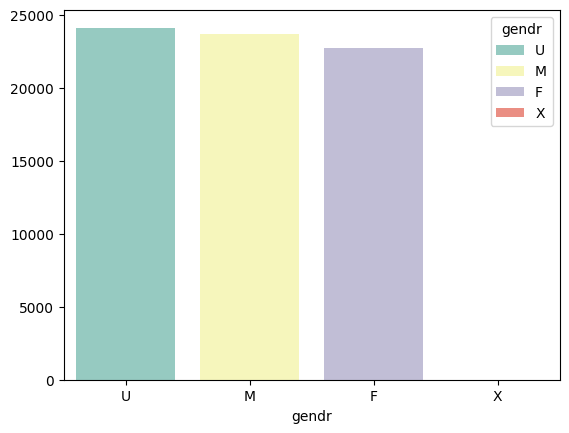

In [150]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=fre_gender.index, y=fre_gender.values, hue=fre_gender.index, palette="Set3", legend=True)

# Insights from the Bar Chart

1. The bar chart confirms the dominance of the undisclosed gender within the dataset.
2. The bar representing U is slighlty taller than the others, emphasizing its higher frequency
3. The difference between the primary clients and the male and females is not extremely big

In [151]:
#Summary statistis for the data frame
df_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


# Calculate the Count for test and control on the start step

In [152]:

started_control = merged_df[(merged_df['Variation'] == 'Control') & (merged_df['process_step'] == 'start')].groupby(['client_id', 'visitor_id', 'visit_id']).size().reset_index(name='count').shape[0]



started_test = merged_df[(merged_df['Variation'] == 'Test') & (merged_df['process_step'] == 'start')].groupby(['client_id', 'visitor_id', 'visit_id']).size().reset_index(name='count').shape[0]
started_test

33219

# Calculate the Count for test and control on the confirm step

In [153]:

confirmed_control = merged_df[(merged_df['Variation'] == 'Control') & (merged_df['process_step'] == 'confirm')].groupby(['client_id', 'visitor_id', 'visit_id']).size().reset_index(name='count').shape[0]


confirmed_test = merged_df[(merged_df['Variation'] == 'Test') & (merged_df['process_step'] == 'confirm')].groupby(['client_id', 'visitor_id', 'visit_id']).size().reset_index(name='count').shape[0]
confirmed_test

21791

# Calculate the completion Rate

In [196]:
control_completion_rate = confirmed_control / started_control 
print(control_completion_rate)

test_completion_rate = confirmed_test / started_test
print(test_completion_rate) 

0.5196046767004715
0.6559800114392366


The new design shows that there more people using the online platform compared to the old traditional interface

# Time Spent on Each Step

In [155]:
#sorteren
merged_df['date_time'] = pd.to_datetime(merged_df['date_time'])

df_web_data_sorted = merged_df.sort_values(by=['client_id','visitor_id','visit_id','date_time']).copy()
    
#calculation preparations
df_web_data_sorted['end_of_step']=df_web_data_sorted.groupby ('visit_id')['date_time'].shift(-1)

#time difference
df_web_data_sorted['time_diff']=(df_web_data_sorted['end_of_step']-df_web_data_sorted['date_time']).dt.round('ms')

#avg per step
time_spent=df_web_data_sorted.groupby(['visit_id','process_step'])['time_diff'].mean().rename('average').reset_index()
time_spent=time_spent.groupby('process_step')[['average']].mean()
time_spent

,average
process_step,
confirm,0 days 00:02:57.755315050
start,0 days 00:00:49.789406432
step_1,0 days 00:00:49.505754541
step_2,0 days 00:01:33.850578228
step_3,0 days 00:02:07.664628342


In [218]:
import matplotlib.pyplot as plt

# Visualize the average time spent per step
plt.figure(figsize=(10, 6))
plt.plot(time_spent['process_step'], time_spent['average'], marker='o', linestyle='-')
plt.title('Average Time Spent per Step')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (ms)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


KeyError: 'process_step'

<Figure size 1000x600 with 0 Axes>

# Error Rates

In [156]:
# Calculate the count of backward steps for control and test groups
backward_control = merged_df[(merged_df['Variation'] == 'Control') & (merged_df['process_step'] != 'start')].groupby(['client_id', 'visitor_id', 'visit_id']).size().reset_index(name='count').shape[0]
backward_test = merged_df[(merged_df['Variation'] == 'Test') & (merged_df['process_step'] != 'start')].groupby(['client_id', 'visitor_id', 'visit_id']).size().reset_index(name='count').shape[0]

# Calculate the total number of steps for control and test groups
total_steps_control = merged_df[merged_df['Variation'] == 'Control'].groupby(['client_id', 'visitor_id', 'visit_id']).size().shape[0]
total_steps_test = merged_df[merged_df['Variation'] == 'Test'].groupby(['client_id', 'visitor_id', 'visit_id']).size().shape[0]

# Calculate error rates for control and test groups
error_rate_control = round(backward_control / total_steps_control, 2)
error_rate_test = round(backward_test / total_steps_test, 2)

# Print error rates
print("Error rate for control group:", error_rate_control)
print("Error rate for test group:", error_rate_test)

# Check if error rates are the same for control and test groups
if error_rate_control == error_rate_test:
    print("Error rates are the same for control and test groups.")
else:
    print("Error rates are not the same for control and test groups.")

Error rate for control group: 0.77
Error rate for test group: 0.86
Error rates are not the same for control and test groups.


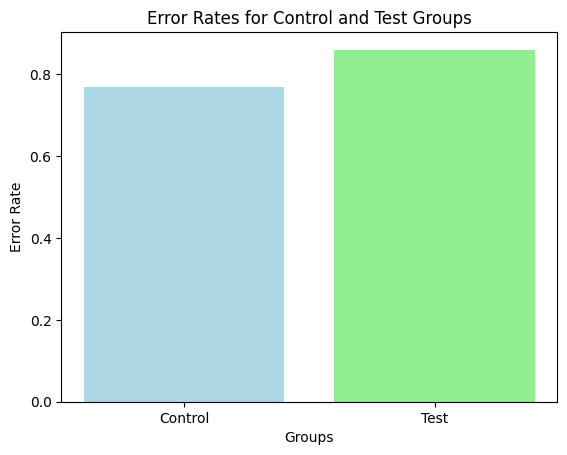

In [214]:
import matplotlib.pyplot as plt

# Define the data for visualization
error_rates = [error_rate_control, error_rate_test]
labels = ['Control', 'Test']

# Create the bar plot
plt.bar(labels, error_rates, color=['lightblue', 'lightgreen'])
plt.title('Error Rates for Control and Test Groups')
plt.xlabel('Groups')
plt.ylabel('Error Rate')
plt.show()

In [157]:
df_demo.to_csv('demo.csv')

In [158]:
merged_df.to_csv('merged.csv')

In [31]:
df_experiment.to_csv('experiment.csv')

In [161]:
#Hypothesis testing: Completion Rate
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# Count of successes (confirmations) and (starts) for Control and Test groups
successes = np.array([confirmed_control, confirmed_test])
trials = np.array([started_control, start_test])

# Perform two-sample proportion z-test
z_stat, p_value = proportions_ztest(successes, trials, alternative='two-sided')

# Print z-statistic and p-value
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Compare p-value with significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in completion rates.")
else:
    print("Accept the null hypothesis: There is no statistically significant difference in completion rates.")

Z-statistic: -35.10372555329904
P-value: 5.913824581881258e-270
Reject the null hypothesis: There is a statistically significant difference in completion rates.


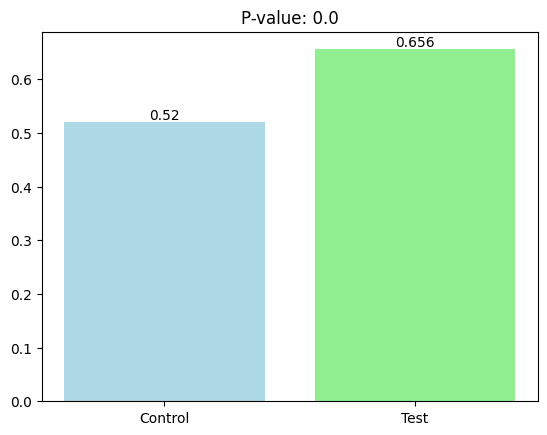

In [212]:

# Count of successes (confirmations) and (starts) for Control and Test groups
successes = np.array([confirmed_control, confirmed_test])
trials = np.array([started_control, started_test])

# Perform two-sample proportion z-test
z_stat, p_value = proportions_ztest(successes, trials, alternative='two-sided')

# Visualize the completion rates for Control and Test groups
labels = ['Control', 'Test']
completion_rates = successes / trials

fig, ax = plt.subplots()
bars = ax.bar(labels, completion_rates, color=['lightblue', 'lightgreen'])

# Add data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., yval, round(yval, 3), ha='center', va='bottom')

# Add p-value as a title
plt.title(f'P-value: {round(p_value, 3)}')

# Show plot
plt.show()

In [173]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest


# Calculate the completion rate increase needed for cost-effectiveness
threshold_completion_rate = control_completion_rate + 0.05
# Perform one-sided two-proportion z-test
z_stat, p_value = proportions_ztest([successes_test, successes_control], [trials_test, trials_control], alternative='larger')
# Print z-statistic and p-value
print("\nOne-Sided Two-Proportion Z-Test Results with Cost-Effectiveness Threshold:")
print(f"  - z-statistic: {z_stat}")
print(f"  - p-value: {p_value}")
# Check significance
if p_value < alpha:
    print("Reject Null Hypothesis: The new design leads to a completion rate increase greater than 5% and is cost-effective.")
else:
    print("Accept Null Hypothesis: The new design does not lead to a completion rate increase greater than 5% and may not be cost-effective.")

NameError: name 'successes_test' is not defined

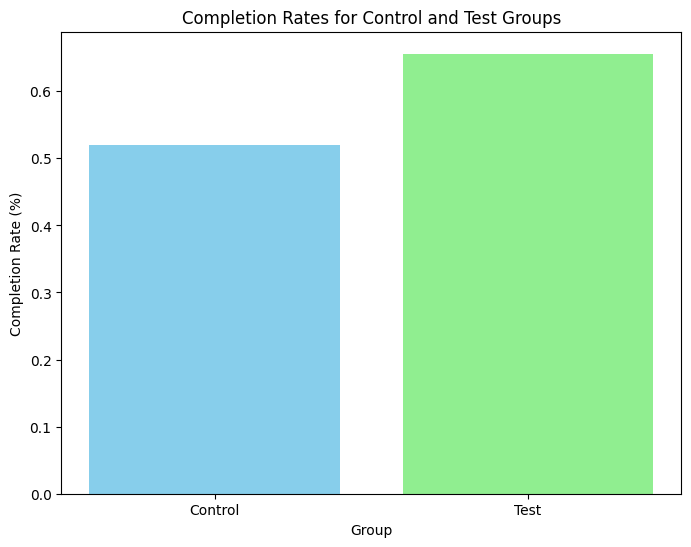

In [205]:
import matplotlib.pyplot as plt
# Data for bar chart
completion_rates = [control_completion_rate, test_completion_rate]
labels = ['Control', 'Test']
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, completion_rates, color=['skyblue', 'lightgreen'])
plt.title('Completion Rates for Control and Test Groups')
plt.xlabel('Group')
plt.ylabel('Completion Rate (%)')
# Show plot
plt.show()

In [213]:
import matplotlib.pyplot as plt

# Define the steps and average times for both groups
steps = time_spent['process_step'].unique()
test_times = average_time_spent_per_step_test.values
control_times = average_time_spent_per_step_control.values

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(steps))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, test_times, color='lightgreen', width=bar_width, edgecolor='grey', label='Test')
plt.bar(r2, control_times, color='skyblue', width=bar_width, edgecolor='grey', label='Control')

# Add labels and title
plt.xlabel('Process Step', fontweight='bold')
plt.ylabel('Average Time Spent', fontweight='bold')
plt.title('Average Time Spent per Step for Test and Control Groups', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(steps))], steps)
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'process_step'

In [209]:
# Check the column names
print(time_spent.columns)

# Display the contents of the DataFrame
print(time_spent)

Index(['average'], dtype='object')
                               average
process_step                          
confirm      0 days 00:02:57.755315050
start        0 days 00:00:49.789406432
step_1       0 days 00:00:49.505754541
step_2       0 days 00:01:33.850578228
step_3       0 days 00:02:07.664628342
